In [1]:
# 데이터 경로
data_path = './data/'

# 훈련, 검증, 테스트 경로 설정
train_path = data_path + 'train/'
valid_path = data_path + 'val/'
test_path = data_path + 'test/'

In [2]:
from glob import glob

print(f'훈련 데이터 개수 : {len(glob(train_path + "*/*"))}')
print(f'검증 데이터 개수 : {len(glob(valid_path + "*/*"))}')
print(f'테스트 데이터 개수 : {len(glob(test_path + "*/*"))}')

훈련 데이터 개수 : 5216
검증 데이터 개수 : 16
테스트 데이터 개수 : 624


In [3]:
glob(train_path+"*")

['./data/train\\NORMAL', './data/train\\PNEUMONIA']

In [4]:
all_normal_imgs = [] # 모든 정상 이미지를 담을 리스트 초기화
all_pneumonia_imgs = [] # 모든 폐렴 이미지를 담을 리스트 초기화

for cat in ['train/', 'val/', 'test/']:
    data_cat_path = data_path + cat
    # 정상, 폐렴 이미지 경로
    normal_imgs = glob(data_cat_path + 'NORMAL/*')
    pneumonia_imgs = glob(data_cat_path + 'PNEUMONIA/*')
    
    # 정상, 폐렴 이미지 경로를 리스트에 추가
    all_normal_imgs.extend(normal_imgs)
    all_pneumonia_imgs.extend(pneumonia_imgs)
    
print(f'정상 흉부 이미지 개수 : {len(all_normal_imgs)}')
print(f'폐렴 흉부 이미지 개수 : {len(all_pneumonia_imgs)}')

정상 흉부 이미지 개수 : 1583
폐렴 흉부 이미지 개수 : 4273


([<matplotlib.patches.Wedge at 0x198ba5090a0>,
 [Text(0.7266104793469584, 0.8258554421345079, 'Normal'),
  Text(-0.7266104020247887, -0.825855510164687, 'Pneumonia')],
 [Text(0.39633298873470457, 0.4504666048006406, '27.0%'),
  Text(-0.3963329465589756, -0.450466641908011, '73.0%')])

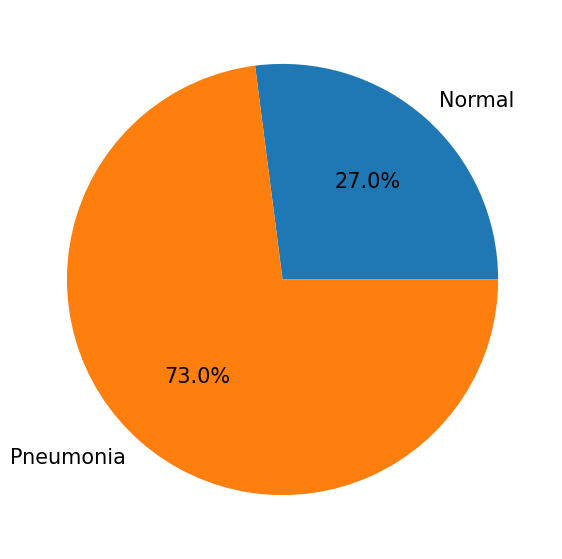

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

label = ['Normal', 'Pneumonia'] # 타깃값 레이블
# 타깃값 분포 파이 그래프
plt.pie([len(all_normal_imgs), len(all_pneumonia_imgs)],
        labels=label,
        autopct='%.1f%%'
        )


In [8]:
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_paths, rows=2, cols=3):
    assert len(img_paths) <= rows*cols # 이미지가 행/열 개수보다 많으면 오류발생
    
    mpl.rc('font', size=8)
    plt.figure(figsize=(15, 8 ))
    grid = gridspec.GridSpec(rows, cols) # 서브플롯 배치
    
    # 이미지 출력
    for idx, img_path in enumerate(img_paths):
        image = cv2.imread(img_path)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

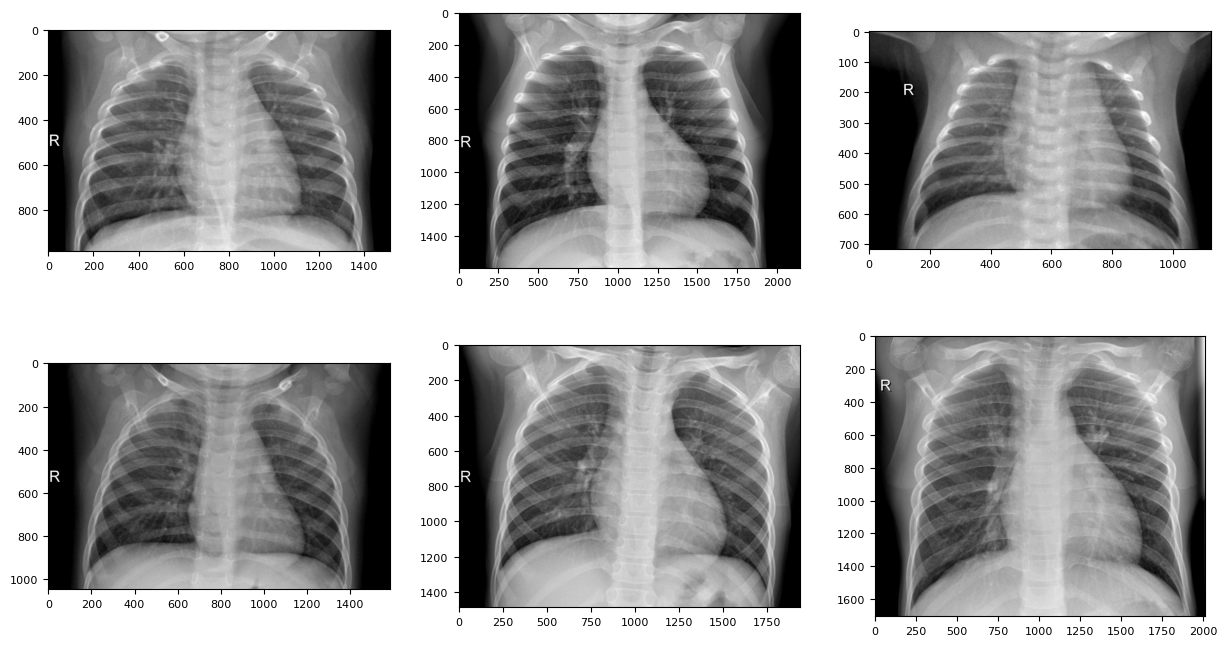

In [9]:
num_of_imgs = 6
normal_img_paths = all_normal_imgs[-num_of_imgs:]

# 이미지 출력
show_image(normal_img_paths)

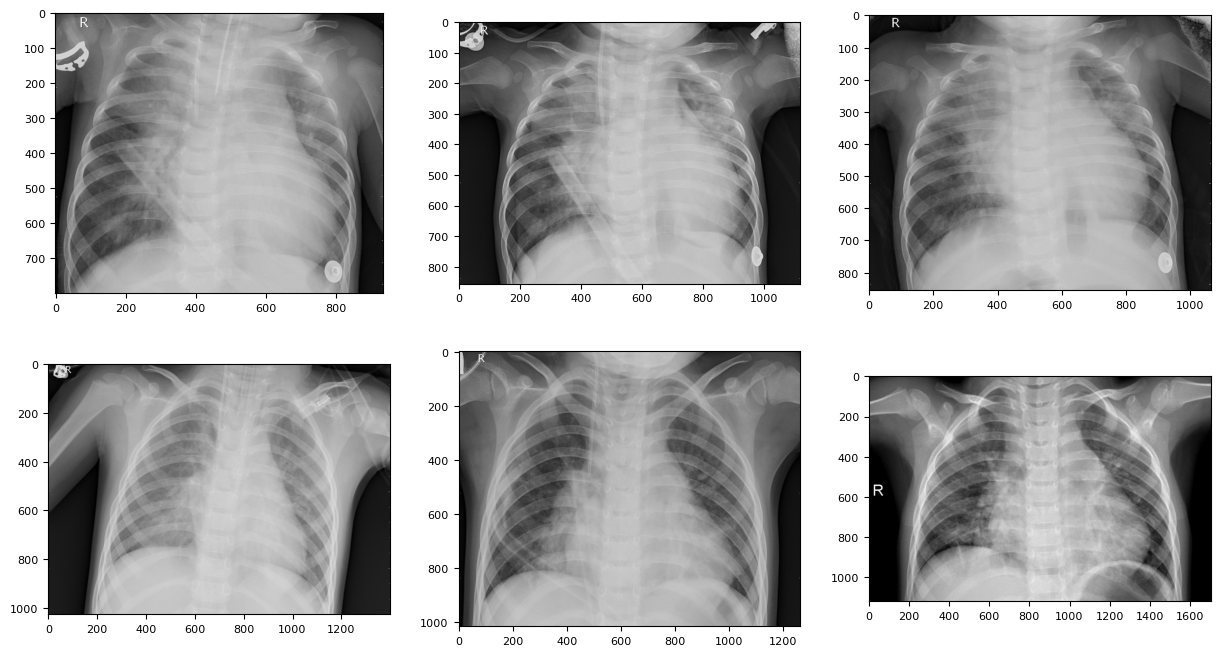

In [10]:
# 폐렴 엑스선 이미지 경로(마지막 6장)
pneumonia_img_paths = all_pneumonia_imgs[-num_of_imgs:]

# 이미지 출력
show_image(pneumonia_img_paths)